In [1]:
%pylab inline
#sys.path.insert(0, '/home/peter/code/projects/tradesys/')
from tradesys import *
from tradesys.testing import *
import talib as ta
from sklearn.preprocessing import scale
import pandas as pd
import random as rnd

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
init_price = 100.0
spread = 0.02
ps = []
ps.append(init_price)

In [3]:
# random walk
num_entries = 100000
for i in range(num_entries-1):
    ps.append( ps[-1] + round(rnd.normalvariate(0,1), 5) )

In [4]:
ps[0:5]

[100.0, 98.47668, 98.71958000000001, 98.49324000000001, 99.24528000000001]

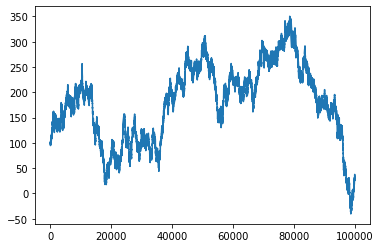

In [5]:
plot(ps);

In [6]:
dti = pd.date_range('2018-01-01', periods=num_entries, freq='Min')
dti

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:01:00',
               '2018-01-01 00:02:00', '2018-01-01 00:03:00',
               '2018-01-01 00:04:00', '2018-01-01 00:05:00',
               '2018-01-01 00:06:00', '2018-01-01 00:07:00',
               '2018-01-01 00:08:00', '2018-01-01 00:09:00',
               ...
               '2018-03-11 10:30:00', '2018-03-11 10:31:00',
               '2018-03-11 10:32:00', '2018-03-11 10:33:00',
               '2018-03-11 10:34:00', '2018-03-11 10:35:00',
               '2018-03-11 10:36:00', '2018-03-11 10:37:00',
               '2018-03-11 10:38:00', '2018-03-11 10:39:00'],
              dtype='datetime64[ns]', length=100000, freq='T')

In [7]:
df = pd.DataFrame(data=ps, index=dti, columns=['Bid'])
df.head()

,Bid
2018-01-01 00:00:00,100.00000
2018-01-01 00:01:00,98.47668
2018-01-01 00:02:00,98.71958
2018-01-01 00:03:00,98.49324
2018-01-01 00:04:00,99.24528


In [8]:
df = df.resample('5Min').ohlc()
df['volume'] = 200000.0
df.head()

Bid                                   volume
                          open       high       low     close          
2018-01-01 00:00:00  100.00000  100.00000  98.47668  99.24528  200000.0
2018-01-01 00:05:00   99.15648  100.29194  98.04609  99.54462  200000.0
2018-01-01 00:10:00   98.78630   98.78630  96.85836  97.21115  200000.0
2018-01-01 00:15:00   97.45951   98.10748  97.31297  97.31297  200000.0
2018-01-01 00:20:00   95.63023   98.03542  95.63023  95.72510  200000.0

In [9]:
noise_datamatrix = df2dmat(df)

In [10]:
# df = pd.read_csv('Coinbase_BTCUSD_1h.csv')
# nd = []
# for i,(d,o,h,l,c,v) in df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume BTC']].iterrows():
#     ds = d.split(' ')[0].split('-')
#     hs = d.split(' ')[1].split('-')[:-1]
#     ds = [int(x) for x in ds]
#     hs = [int(x) for x in hs]
#     nd.append(ds + hs + [0,0] + [o,h,l,c,v])
# datamatrix = DataMatrix()
# for y,mn,d,hr,m,s, o,h,l,c,v in nd:
#     datamatrix.add_row(DateTime(y,mn,d,hr,m,s), o,h,l,c,int(v))

In [11]:
datamatrix = DataMatrix()
datamatrix.load_multicharts('../deep_learning_trader/data/SPY_1_5_15_60_Minutes_01_01_10-10_31_16/SPY_15_Minute_01_01_2010-10_31_2016.txt')
datamatrix.clip_dt(DateTime(2014,1,1), DateTime(2016,1,1))

In [12]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2014-01-02 08:15:00,183.98,184.06,183.83,183.86,0
2014-01-02 08:30:00,184.15,184.18,183.93,183.98,0
2014-01-02 08:45:00,183.97,184.15,183.92,184.15,0
2014-01-02 09:00:00,183.90,184.02,183.88,183.97,0
2014-01-02 09:15:00,183.91,184.00,183.86,183.90,0


In [13]:
len(datamatrix)

16128

In [14]:
#datamatrix = fill_incomplete_datamatrix(datamatrix)

In [15]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2014-01-02 08:15:00,183.98,184.06,183.83,183.86,0
2014-01-02 08:30:00,184.15,184.18,183.93,183.98,0
2014-01-02 08:45:00,183.97,184.15,183.92,184.15,0
2014-01-02 09:00:00,183.90,184.02,183.88,183.97,0
2014-01-02 09:15:00,183.91,184.00,183.86,183.90,0


In [16]:
len(datamatrix)

16128

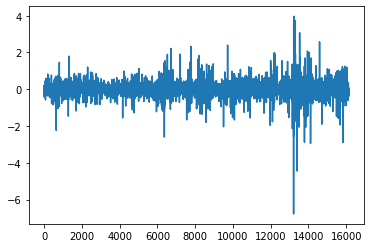

In [17]:
plot( np.diff(array(datamatrix.close)));

In [18]:
#datamatrix.dump_tsys("data.tsys")

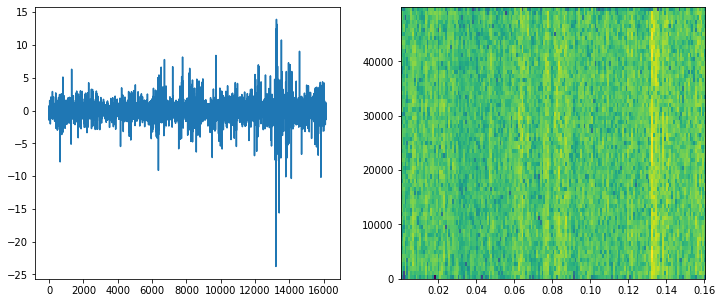

In [24]:
dt = 0.00001
x = scale(np.diff(array(datamatrix.close)) )

NFFT = 128  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.plot(x)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=32)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot
plt.show()

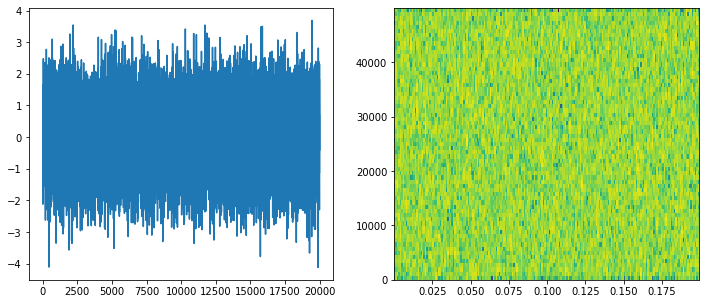

In [25]:
dt = 0.00001
xns = scale(np.diff(array(noise_datamatrix.close))  )

NFFT = 128  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.plot(xns)
Pxx, freqs, bins, im = ax2.specgram(xns, NFFT=NFFT, Fs=Fs, noverlap=32)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot
plt.show()

In [26]:
# denoise 

import time
from datetime import timedelta as td
import librosa
import scipy

def _stft(y, n_fft, hop_length, win_length):
    return librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=win_length)


def _istft(y, hop_length, win_length):
    return librosa.istft(y, hop_length, win_length)


def _amp_to_db(x):
    return librosa.core.amplitude_to_db(x, ref=1.0, amin=1e-20, top_db=80.0)


def _db_to_amp(x,):
    return librosa.core.db_to_amplitude(x, ref=1.0)


def plot_spectrogram(signal, title):
    fig, ax = plt.subplots(figsize=(20, 4))
    cax = ax.matshow(
        signal,
        origin="lower",
        aspect="auto",
        cmap=plt.cm.seismic,
        vmin=-1 * np.max(np.abs(signal)),
        vmax=np.max(np.abs(signal)),
    )
    fig.colorbar(cax)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


def plot_statistics_and_filter(
    mean_freq_noise, std_freq_noise, noise_thresh, smoothing_filter
):
    fig, ax = plt.subplots(ncols=2, figsize=(20, 4))
    plt_mean, = ax[0].plot(mean_freq_noise, label="Mean power of noise")
    plt_std, = ax[0].plot(std_freq_noise, label="Std. power of noise")
    plt_std, = ax[0].plot(noise_thresh, label="Noise threshold (by frequency)")
    ax[0].set_title("Threshold for mask")
    ax[0].legend()
    cax = ax[1].matshow(smoothing_filter, origin="lower")
    fig.colorbar(cax)
    ax[1].set_title("Filter for smoothing Mask")
    plt.show()


def removeNoise(
    audio_clip,
    noise_clip,
    n_grad_freq=2,
    n_grad_time=4,
    n_fft=2048,
    win_length=2048,
    hop_length=512,
    n_std_thresh=1.5,
    prop_decrease=1.0,
    verbose=False,
    visual=False,
):
    """Remove noise from audio based upon a clip containing only noise

    Args:
        audio_clip (array): The first parameter.
        noise_clip (array): The second parameter.
        n_grad_freq (int): how many frequency channels to smooth over with the mask.
        n_grad_time (int): how many time channels to smooth over with the mask.
        n_fft (int): number audio of frames between STFT columns.
        win_length (int): Each frame of audio is windowed by `window()`. The window will be of length `win_length` and then padded with zeros to match `n_fft`..
        hop_length (int):number audio of frames between STFT columns.
        n_std_thresh (int): how many standard deviations louder than the mean dB of the noise (at each frequency level) to be considered signal
        prop_decrease (float): To what extent should you decrease noise (1 = all, 0 = none)
        visual (bool): Whether to plot the steps of the algorithm

    Returns:
        array: The recovered signal with noise subtracted

    """
    if verbose:
        start = time.time()
    # STFT over noise
    noise_stft = _stft(noise_clip, n_fft, hop_length, win_length)
    noise_stft_db = _amp_to_db(np.abs(noise_stft))  # convert to dB
    # Calculate statistics over noise
    mean_freq_noise = np.mean(noise_stft_db, axis=1)
    std_freq_noise = np.std(noise_stft_db, axis=1)
    noise_thresh = mean_freq_noise + std_freq_noise * n_std_thresh
    if verbose:
        print("STFT on noise:", td(seconds=time.time() - start))
        start = time.time()
    # STFT over signal
    if verbose:
        start = time.time()
    sig_stft = _stft(audio_clip, n_fft, hop_length, win_length)
    sig_stft_db = _amp_to_db(np.abs(sig_stft))
    if verbose:
        print("STFT on signal:", td(seconds=time.time() - start))
        start = time.time()
    # Calculate value to mask dB to
    mask_gain_dB = np.min(_amp_to_db(np.abs(sig_stft)))
    print(noise_thresh, mask_gain_dB)
    # Create a smoothing filter for the mask in time and frequency
    smoothing_filter = np.outer(
        np.concatenate(
            [
                np.linspace(0, 1, n_grad_freq + 1, endpoint=False),
                np.linspace(1, 0, n_grad_freq + 2),
            ]
        )[1:-1],
        np.concatenate(
            [
                np.linspace(0, 1, n_grad_time + 1, endpoint=False),
                np.linspace(1, 0, n_grad_time + 2),
            ]
        )[1:-1],
    )
    smoothing_filter = smoothing_filter / np.sum(smoothing_filter)
    # calculate the threshold for each frequency/time bin
    db_thresh = np.repeat(
        np.reshape(noise_thresh, [1, len(mean_freq_noise)]),
        np.shape(sig_stft_db)[1],
        axis=0,
    ).T
    # mask if the signal is above the threshold
    sig_mask = sig_stft_db < db_thresh
    if verbose:
        print("Masking:", td(seconds=time.time() - start))
        start = time.time()
    # convolve the mask with a smoothing filter
    sig_mask = scipy.signal.fftconvolve(sig_mask, smoothing_filter, mode="same")
    sig_mask = sig_mask * prop_decrease
    if verbose:
        print("Mask convolution:", td(seconds=time.time() - start))
        start = time.time()
    # mask the signal
    sig_stft_db_masked = (
        sig_stft_db * (1 - sig_mask)
        + np.ones(np.shape(mask_gain_dB)) * mask_gain_dB * sig_mask
    )  # mask real
    sig_imag_masked = np.imag(sig_stft) * (1 - sig_mask)
    sig_stft_amp = (_db_to_amp(sig_stft_db_masked) * np.sign(sig_stft)) + (
        1j * sig_imag_masked
    )
    if verbose:
        print("Mask application:", td(seconds=time.time() - start))
        start = time.time()
    # recover the signal
    recovered_signal = _istft(sig_stft_amp, hop_length, win_length)
    recovered_spec = _amp_to_db(
        np.abs(_stft(recovered_signal, n_fft, hop_length, win_length))
    )
    if verbose:
        print("Signal recovery:", td(seconds=time.time() - start))
    if visual:
        plot_spectrogram(noise_stft_db, title="Noise")
    if visual:
        plot_statistics_and_filter(
            mean_freq_noise, std_freq_noise, noise_thresh, smoothing_filter
        )
    if visual:
        plot_spectrogram(sig_stft_db, title="Signal")
    if visual:
        plot_spectrogram(sig_mask, title="Mask applied")
    if visual:
        plot_spectrogram(sig_stft_db_masked, title="Masked signal")
    if visual:
        plot_spectrogram(recovered_spec, title="Recovered spectrogram")
    return recovered_signal

STFT on noise: 0:00:00.009370
STFT on signal: 0:00:00.003619
[20.94897  19.847963 19.949635 20.026606 19.897648 19.888306 19.730997
 19.752691 19.238365 19.659346 19.879532 19.60085  19.418766 19.662886
 19.609703 19.723904 20.056332 19.878483 20.118359 19.719917 20.07571
 19.67846  19.595146 20.118559 20.40193  19.82276  19.824833 19.69413
 19.544611 20.479794 20.256329 20.01459  20.14829  20.142162 19.876024
 20.054173 19.965023 19.945423 20.087395 19.897661 20.167381 20.190617
 19.993315 19.754555 19.711147 19.713366 19.83304  19.88687  20.030222
 19.75241  19.96672  20.299915 20.276762 19.648878 19.85162  19.896652
 20.11416  19.453285 20.159103 20.135588 19.478493 19.60471  19.327192
 19.892403 21.163685] -36.4971
Masking: 0:00:00.002411
Mask convolution: 0:00:00.003271
Mask application: 0:00:00.004028
Signal recovery: 0:00:00.011012


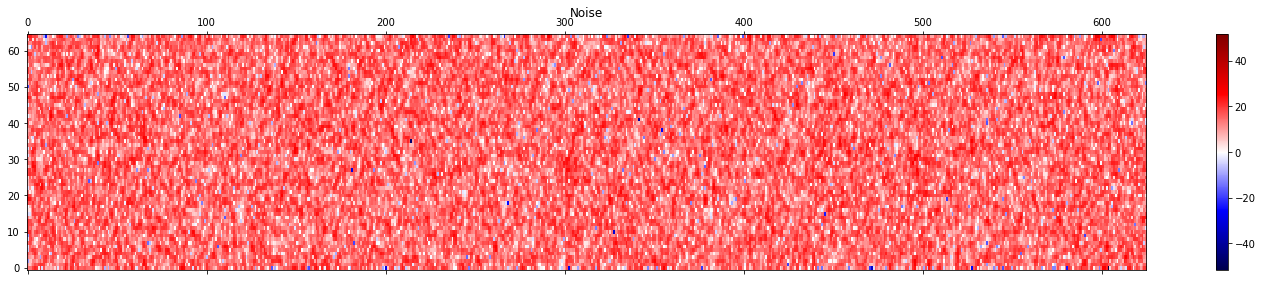

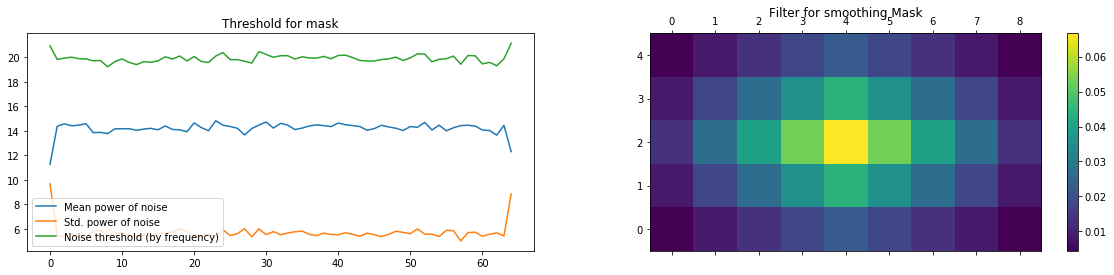

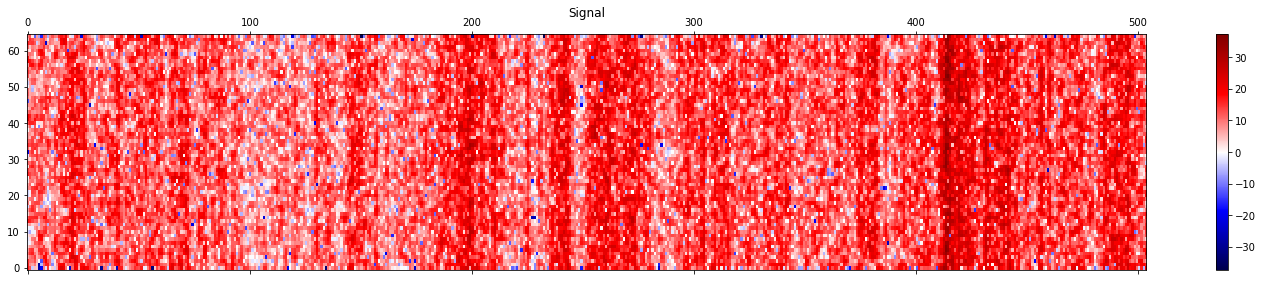

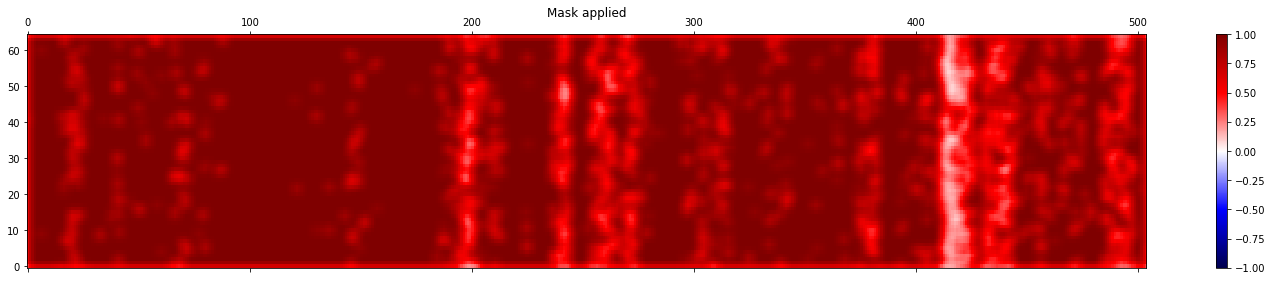

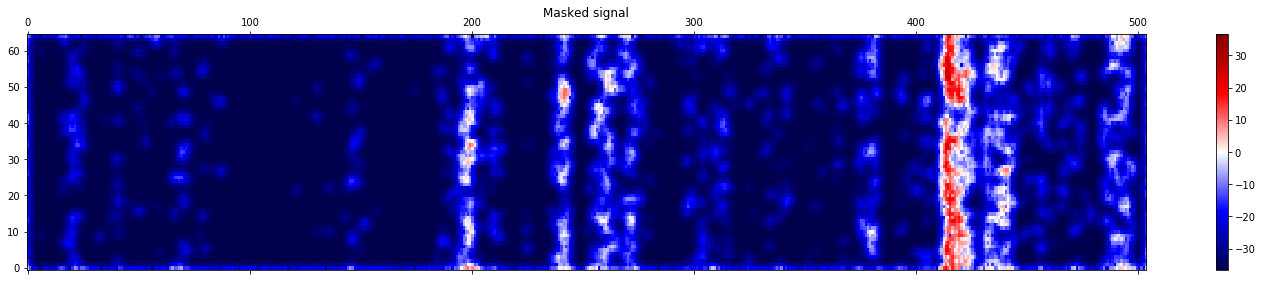

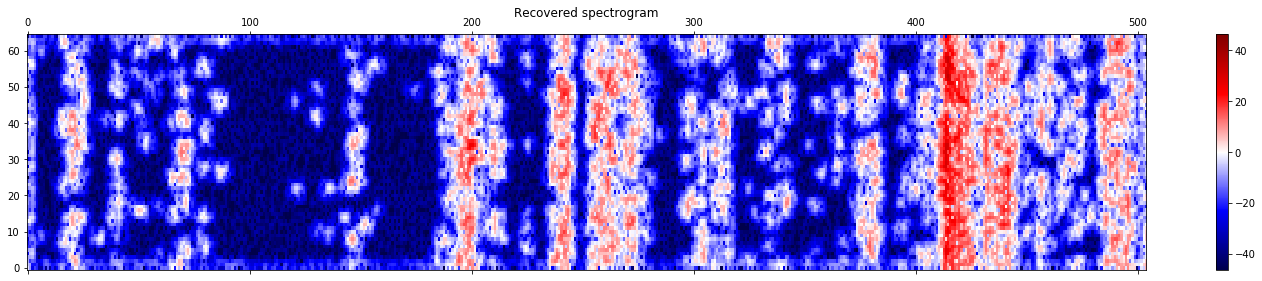

In [31]:
output = removeNoise(audio_clip=x.reshape(-1), noise_clip=xns, n_std_thresh=1, prop_decrease=1.0, 
                     n_fft=128, win_length=128, hop_length=32, 
                     verbose=True,visual=True)

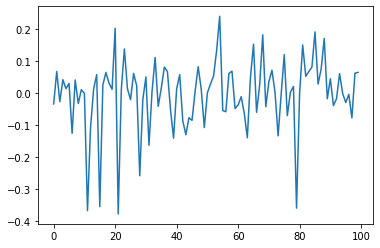

In [30]:
plot(output[10000:10100]);

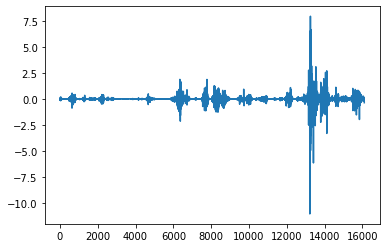

In [32]:
plot(output);